In [1]:
import pyKriging as krige

In [2]:
import numpy as np

In [3]:
import time

In [4]:
x_all = np.genfromtxt('x_shuffled.csv', delimiter=',')

In [5]:
y_all = np.genfromtxt('y_shuffled.csv', delimiter=',')

In [6]:
x_train=x_all[:300,:]

In [7]:
y_train=y_all[:300]

In [8]:
start = time.time()
k = krige.kriging(x_train, y_train)  
k.train()
stop = time.time()
print(stop-start)

1749.726066827774


In [11]:
start = time.time()
y_predict = []
for i in range(0,len(x_all)):
    y_predict.append(k.predict(x_all[i]))
stop = time.time()
print(stop-start)

5.009033679962158


In [12]:
#np.savetxt('y_predict_python.csv', y_predict, delimiter=',')

In [13]:
import matplotlib.pyplot as plt

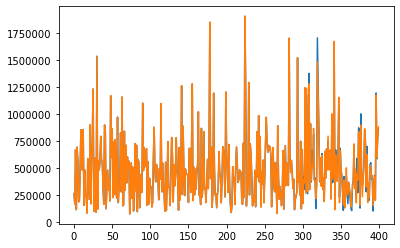

In [14]:
linaxis=range(0,400)
plt.plot(linaxis, y_all)
plt.plot(linaxis,y_predict)

In [15]:
np.savetxt('y_predict_python_pyKriging.csv', y_predict, delimiter=',')